## Project goals
In this project, we will visualize the Netflix stock data. In finance, a stock profile is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, we will only visualize data for the year of 2017. Specifically, we'll be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. You can learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, we will analyze, prepare, and plot data. Our visualizations will help the financial analysts asses the risk of the Netflix stock.

After we complete our visualizations, we'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Our slides should include:

- A title slide
- A list of our visualizations and our role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)

In [34]:
# Import the libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
# Load the dataset and inspect it
netflix_stocks = pd.read_csv("NFLX.csv")
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [36]:
# Load the dataset and inspect it
dowjones_stocks = pd.read_csv("DJI.csv")
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [37]:
# Load the dataset and inspect it
netflix_stocks_quarterly = pd.read_csv("NFLX_daily_by_quarter.csv")
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


In [38]:
# Rename Adj Close to Price to communicate the adjusted close price
netflix_stocks.rename(columns = {"Adj Close" : "Price"}, inplace = True)

dowjones_stocks.rename(columns = {"Adj Close" : "Price"}, inplace = True)

netflix_stocks_quarterly.rename(columns = {"Adj Close" : "Price"}, inplace = True)

# Check the result
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter.

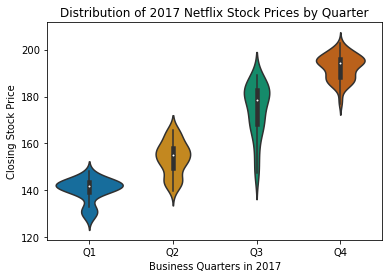

In [39]:
# Instantiate a figure and create a violin plot
ax = sns.violinplot(data=netflix_stocks_quarterly, x="Quarter", y="Price")
# Add title
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
# Add labels
ax.set_xlabel("Business Quarters in 2017")
ax.set_ylabel("Closing Stock Price")
plt.show()

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

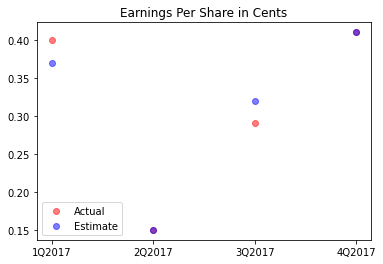

In [40]:
# Set the variables
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

# Create a scatter plot
plt.scatter(x_positions, earnings_actual, color="red", alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color="blue", alpha=0.5)

# Add labels
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
plt.show()

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. Plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. 

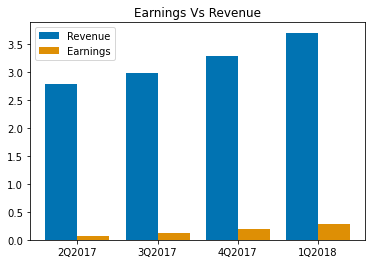

In [41]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]
labels = ["Revenue", "Earnings"]

# Numbers for Revenue
n = 1 # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
# Calculate settings for bar 1
bars1_x = [t*element + w*n for element in range(d)]
# Create a bar plot
plt.bar(bars1_x, revenue_by_quarter, label=labels[0])


# Numbers for Earnings
n = 2 # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
# Calculate the settings for bar 2
bars2_x = [t*element + w*n for element in range(d)]
# Create a bar plot
plt.bar(bars2_x, earnings_by_quarter, label=labels[1])

# Calculate middle settings
middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]

# Add labels
plt.legend()
plt.xticks(middle_x, quarter_labels)
plt.title("Earnings Vs Revenue")
plt.show()

Now we will compare Netflix stock to the Dow Jones Industrial Average in 2017 by plotting two line charts side by side in one figure. Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.

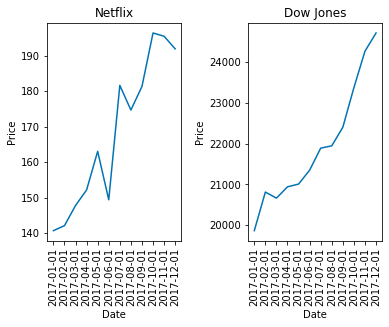

In [42]:
# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks["Date"], netflix_stocks["Price"])
plt.title("Netflix")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation = "vertical")

# Adjust the width between subplots
plt.subplots_adjust(wspace=0.5)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks["Date"], dowjones_stocks["Price"])
plt.title("Dow Jones")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation = "vertical")
plt.show()